# Supervised Machine Learning: Regression
Linear Regression

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/coding/housing_prices_iter7.csv")

In [ ]:

data["MSZoning"]= data["MSZoning"].str.strip()
#data["MSZoning"]= data["MSZoning"].str.replace('C\+', 'C',  regex=True)
data["MSZoning"]= data["MSZoning"].apply(lambda x: x.replace("C\+'", "C"))
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


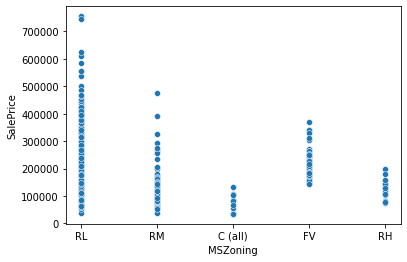

In [ ]:
sns.scatterplot(x= "MSZoning", y = "SalePrice", data = data )

# Data Exploration and Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# seperating features and target
X= data
y= X.pop('SalePrice')

In [ ]:

#fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
#sns.heatmap(X.isna(), annot=True, linewidths=.5, ax=ax)


# Looking for Null values

In [ ]:
X['PoolQC'].isna().sum()

1453

In [ ]:
X['Alley'].isna().sum()

1369

In [ ]:
X['MiscFeature'].isna().sum()

1406

In [ ]:
X['Fence'].isna().sum()

1179

In [ ]:
X['FireplaceQu'].isna().sum()

690

In [ ]:
X=X.drop(['PoolQC', 'Alley','MiscFeature','Fence', 'Id' ], axis = 1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


# Data Preprocessing


# Creating pipeline and using one hot encoding


In [ ]:
# display pipeline
#from sklearn import set_config
#set_config(display = 'diagram')

In [ ]:
X["MSZoning"]= X["MSZoning"].apply(lambda x: x.strip())
#X["MSZoning"]= X["MSZoning"].apply(lambda x: x.strip("RL", "RL"))
X["MSZoning"]= X["MSZoning"].apply(lambda x: x.replace("C (all)", "C"))

X["MSZoning"].value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

In [ ]:
X["MSZoning"].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [ ]:
scaler = MinMaxScaler()
# select categorical and numerical column names

data_cat_columns =X.select_dtypes(exclude="number").copy().columns#[1:]
data_num_columns =X.select_dtypes(include="number").copy().columns
#data_ord_coloumns = X.select_dtypes(exclude="number").copy().MSZoning

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(KNNImputer(n_neighbors=5), scaler )
                          
    
 
# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown = 'ignore')           # using one hot encoder to convert categorical values in numeric value
)

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
#unique_elements = X["MSZoning"].unique()
#ordinal_pipe = make_pipeline(OrdinalEncoder(categories=[unique_elements], handle_unknown='use_encoded_value', unknown_value=-1))

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, data_num_columns),
        ("cat_pipe", categoric_pipe, data_cat_columns)
        
        
    ]
)

In [ ]:
data_num_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath',...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondi

# Feature Selection with low Variance


In [ ]:
X_prep = preprocessor.fit_transform(X)

In [ ]:
X_prep

<1460x275 sparse matrix of type '<class 'numpy.float64'>'
	with 91016 stored elements in Compressed Sparse Row format>

In [ ]:
X_prep_df = pd.DataFrame(X_prep.toarray())

NameError: ignored

In [ ]:
X_prep_df = pd.DataFrame(X_prep_df)
#pd.DataFrame(X_prep_df, columns=preprocessor.get_feature_names())

#X_prep_df.columns = preprocessor.get_feature_names()
X_prep_df

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#colnames = my_onehot.get_feature_names_out(X_cat_imputed.columns)
#df.columns = colnames
#df.head()

# Feature Selection using low variance

In [ ]:
# looking at the varience of all the features
X_prep_df.var().sort_values().to_list()

In [ ]:
# Create VarianceThreshold object with a variance with a threshold of 0.2
var_thr = VarianceThreshold(threshold = 0.009) #Removing both constant and quasi-constant
var_thr.fit(X_prep_df)      # dropping coloumn based on the low variance(threshold)

var_thr.get_support()
#array([False,  True,  True,  True,  True,  True,  True,  True, False])
X_prep_var = var_thr.fit_transform(X_prep_df)


X_prep_var



array([[0.23529412, 0.66666667, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.55555556, 0.875     , ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.66666667, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.44444444, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.44444444, 0.625     , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
print("shape before:", X_prep_df.shape)
print("shape after:", X_prep_var.shape)

shape before: (1460, 275)
shape after: (1460, 190)


# Splitting test-train data

In [ ]:
# spliiting test-train set of the data after selecting features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep_var, y, test_size=0.2, random_state=123)


In [ ]:
X_train

array([[0.23529412, 0.66666667, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.55555556, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.55555556, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.66666667, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.44444444, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.55555556, 0.625     , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y_test

147     222500
676      87000
1304    130000
1372    274300
1427    140000
         ...  
1012    165000
1059    220000
890     122900
628     135000
352      95000
Name: SalePrice, Length: 292, dtype: int64

# Linear Regression model

In [ ]:
# linear regression model after feature dropped using low variance
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(X_train), y_train)


LinearRegression()

In [ ]:
print(
    lm.coef_, 
    lm.intercept_
    )

[-1.56515651e+04  6.75733504e+04  3.91827168e+04  1.25526680e+04
  3.17236900e+03  7.12400967e+03  1.58344536e+03 -9.13646580e+03
  3.54762834e+04  2.55949572e+05  2.21776930e+04  4.98068878e+03
  1.91477818e+04  4.17415588e+03 -3.12151755e+04  2.62687995e+04
  1.37612809e+04 -3.59367960e+03  6.30094281e+04 -3.23217336e+04
  1.66923130e+04 -1.30690503e+02  4.30001474e+03  1.18613069e+04
 -1.52994583e+03 -1.64301556e+03  3.97993041e+04  3.41311988e+04
  3.68087858e+04  3.23753196e+04  2.52318485e+04  3.26210052e+04
  2.46677655e+04 -5.63850584e+14 -5.63850584e+14 -5.63850584e+14
 -5.63850584e+14  5.89948278e+03  1.40281612e+04 -1.91255330e+03
  4.50737924e+03 -2.07607003e+03  1.02055401e+04 -1.57522306e+03
  1.19707818e+04 -2.46988838e+03 -1.06561751e+04 -4.54084727e+03
  9.84987586e+03 -2.24613345e+04 -1.29859265e+04 -7.71582239e+03
  1.01289359e+03 -2.01510633e+04 -1.57503141e+04 -1.32923469e+04
  4.55567287e+04  3.88455050e+04 -1.68646855e+04 -9.84074064e+03
 -1.45949744e+04 -3.61275

# Results on test set

In [ ]:
lm.predict(np.array(X_test))

array([216624.,  97096., 116176., 245232., 115096., 198640., 332048.,
       131184., 151920., 112200., 150064., 232112., 137856., 104416.,
       273440., 210504., 138928., 343152., 215696., 206672., 155208.,
       181688., 130120., 157960., 206592., 150608., 239920., 150728.,
       110048., 128608., 134880., 215152., 108400., 181792., 335504.,
       193520., 166560., 344144., 192376.,  95536., 146112., 186672.,
       238384., 152240., 195760., 117024., 335152., 261152., 232464.,
       109240., 228280., 212240., 149728., 156592., 119552., 158576.,
       131888., 169040., 229232., 407552., 116464., 331552.,  95824.,
       204288., 207488., 137904., 110640., 218768., 225552., 151528.,
       158560., 146112., 152688., 257280., 145120., 151968., 191184.,
       134624., 216592., 103152., 317200., 269664.,  89120., 136720.,
       161416., 132736.,  85064., 141440.,  35472., 260976., 119200.,
       169744., 165616., 196048., 133616., 122640., 213888.,  87712.,
       221904., 1407

In [ ]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test)),
    'true_values':y_test
})
results

,predictions,true_values
147,216624.0,222500
676,97096.0,87000
1304,116176.0,130000
1372,245232.0,274300
1427,115096.0,140000
...,...,...
1012,167056.0,165000
1059,239792.0,220000
890,104304.0,122900
628,202256.0,135000


* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [ ]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    7.582625e+08
dtype: float64

In [ ]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

758262548.8458904

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [ ]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    27536.567485
dtype: float64

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [ ]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    17995.996575
dtype: float64

In [ ]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

17995.996575342466

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [ ]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mae': 17995.996575342466,
  'mape': 0.10318878615421202,
  'mse': 758262548.8458904}}


        MSE: 758262548.8458904
        RMSE: 27536.567484817173
        MAE: 17995.996575342466
        MAPE: 0.10318878615421202
        
466160.0 37900


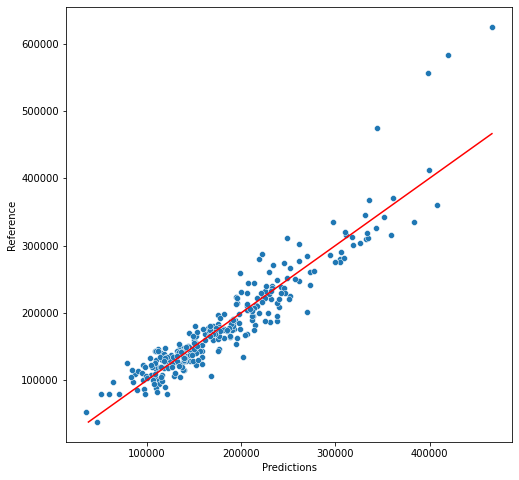

In [ ]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

In [ ]:
train_score = lm.score(X_train,y_train)
test_score = lm.score(X_test,y_test)

print(f'Train Accuracy : {train_score:.3f}')
print(f'Test Accuracy : {test_score:.3f}')

Train Accuracy : 0.892
Test Accuracy : 0.877


# Feature Selection based on Collinearity

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

# X_train.drop(columns=["feature_27", "feature_28"], inplace=True)
#fig, ax = plt.subplots(figsize=(18,18))
corrMatrix = X_prep_df.corr().abs()
#sn.heatmap(corrMatrix, annot=True);
corrMatrix

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,1.000000,0.379431,0.139781,0.032628,0.059316,0.027850,0.040581,0.022233,0.069836,0.065649,...,0.014005,0.045156,0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,0.051068
1,0.379431,1.000000,0.423084,0.213731,0.031605,0.091443,0.056400,0.178839,0.233167,0.072293,...,0.050219,0.102463,0.023457,0.070002,0.016490,0.036293,0.016647,0.015182,0.066121,0.100739
2,0.139781,0.423084,1.000000,0.105806,0.005636,0.014228,0.013788,0.103498,0.214103,0.111170,...,0.015040,0.020039,0.005722,0.002292,0.029126,0.013208,0.008966,0.010781,0.005711,0.022635
3,0.032628,0.213731,0.105806,1.000000,0.091932,0.572323,0.550684,0.413702,0.239666,0.059119,...,0.021172,0.327412,0.057962,0.225013,0.103535,0.041677,0.044950,0.025515,0.143282,0.323295
4,0.059316,0.031605,0.005636,0.091932,1.000000,0.375983,0.073741,0.129254,0.046231,0.040229,...,0.019779,0.156175,0.050663,0.163684,0.046367,0.038888,0.033444,0.023873,0.161642,0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.016241,0.036293,0.013208,0.041677,0.038888,0.045601,0.040294,0.012080,0.014874,0.015130,...,0.003073,0.015827,0.002378,0.020457,0.014289,1.000000,0.004772,0.006177,0.112080,0.016038
271,0.030002,0.016647,0.008966,0.044950,0.033444,0.010104,0.020727,0.010208,0.021369,0.026277,...,0.005337,0.027489,0.004131,0.035530,0.024817,0.004772,1.000000,0.010729,0.194663,0.027856
272,0.000983,0.015182,0.010781,0.025515,0.023873,0.035785,0.048056,0.010257,0.000765,0.007929,...,0.006909,0.035587,0.005348,0.028599,0.032128,0.006177,0.010729,1.000000,0.252006,0.036062
273,0.024359,0.066121,0.005711,0.143282,0.161642,0.158427,0.120577,0.089045,0.019560,0.041207,...,0.027414,0.645698,0.097031,0.634322,0.582947,0.112080,0.194663,0.252006,1.000000,0.654323


In [ ]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
to_drop

[12,
 22,
 24,
 26,
 40,
 42,
 46,
 52,
 57,
 59,
 82,
 103,
 110,
 113,
 119,
 121,
 127,
 145,
 149,
 150,
 151,
 153,
 155,
 157,
 158,
 159,
 163,
 168,
 173,
 176,
 183,
 187,
 203,
 206,
 216,
 220,
 221,
 225,
 237,
 243,
 251,
 252,
 256,
 259,
 268,
 274]

In [ ]:
# drop cols 
X_colinear = X_prep_scaled.drop(columns=to_drop)

X_colinear


NameError: ignored

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_colinear, y, test_size=0.2, random_state=123)


In [ ]:
#  lr on collinear feature selection
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(X_train_c), y_train_c)

In [ ]:
# result on test set with collinear feature selection
lm.predict(np.array(X_test_c))

In [ ]:
results_c = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test_c)),
    'true_values':y_test_c
})
results_c

In [ ]:
mse_pre_c = (results_c
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse_c = mse_pre_c.loc['sum'] / mse_pre_c.loc['count']
mse_c
rmse_c= (mse_pre.loc['sum'] / mse_pre_c.loc['count'])**0.5
rmse_c

In [ ]:


mod_res['1st_iter'] = plot_predictions(y_test_c, results_c['predictions'])

# Using Scikit learn SK best

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
preprocessor_best = make_pipeline(preprocessor, SelectKBest(score_func=f_regression, k=174))

In [ ]:
#preprocessor_best

In [ ]:
# making pipeline

full_pipeline = make_pipeline(preprocessor_best, LinearRegression())

In [ ]:

#full_pipeline

In [ ]:
full_pipeline.fit(X_train, y_train)

# Check Accuracy

In [ ]:
y_train_pred = full_pipeline.predict(X_train)
y_test_pred = full_pipeline.predict(X_test)

In [ ]:
y_test_pred 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
# model evaluation for testing set
from sklearn import metrics
from math import sqrt
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)


rms = sqrt(mean_squared_error(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rms))  # The lower the RMSE, the better a given model is able to “fit” a dataset.
print('R2 score is {}'.format(r2))

In [ ]:
train_score = full_pipeline.score(X_train,y_train)
test_score = full_pipeline.score(X_test,y_test)

print(f'Train Accuracy : {train_score:.3f}')
print(f'Test Accuracy : {test_score:.3f}')

# Submission

In [ ]:
# loading test csv
test_data = pd.read_csv("/content/drive/MyDrive/coding/Kaggle/test.csv")

In [ ]:
test = full_pipeline.predict(test_data)
test 

In [ ]:
test_data["SalePrice"] = test

In [ ]:
test_data["SalePrice"]

In [ ]:
Submission = test_data[["Id","SalePrice"]]

In [ ]:
Submission.to_csv("results.csv", index = False)

In [ ]:
from google.colab import files
files.download('results.csv')

# Hypertuning with gridSearch CV


In [ ]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion


pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Lasso())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(full_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

predicted = grid.predict(X_test, y_test)

print('Score:\t{}'.format(grid.score(X_test, y_test)))


In [ ]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=param_grid,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)